In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [57]:
from scipy.stats import chi2_contingency, fisher_exact
from IPython.display import display


In [58]:
data = pd.read_csv('PCC.individual.project.data.csv')


In [59]:
# data.head()


In [60]:
# list(data.columns)

## Clean Data to get event free survival

In [61]:
def get_risk(patient):
    if patient.death == 1 and patient.time < 365:
        # Patient is high risk
        return 1
    elif patient.death == 0 and patient.time > 730:
        # Patient is low risk
        return 0
    else:
        # Patient needs to be dropped, insufficient data
        return 'drop'


In [62]:
# data.apply(get_risk, axis=1)

In [63]:
data['high_risk'] = data.apply(get_risk, axis=1)
data = data.loc[lambda patient: patient.high_risk != 'drop']


In [64]:
data = data.drop(['time', 'death'], axis=1)

In [65]:
data.head()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
2,ASC,ASC-001-0005,26.2000,167.9,73.90000,5.068904,2.639057,2.890372,2.27,4.663439,...,0,0,0,1,0,0,0,0,0,1
3,ASC,ASC-001-0008,26.9915,166.7,83.50879,4.812184,3.761200,3.688879,2.20,4.820282,...,0,0,0,1,0,0,0,0,0,1
6,ASC,ASC-001-0013,32.2000,176.9,100.70000,4.941642,2.772589,3.044522,2.45,4.574711,...,0,0,0,1,0,0,0,0,0,1
16,ASC,ASC-003-0002,25.8000,163.0,68.60000,6.306275,5.135798,5.521461,2.25,4.574711,...,0,0,0,1,0,0,0,0,0,1
21,ASC,ASC-003-0009,25.1000,178.0,79.60000,6.511745,2.079442,3.526361,2.25,5.123964,...,0,0,0,1,0,0,0,0,0,1


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_risk', ylabel='count'>

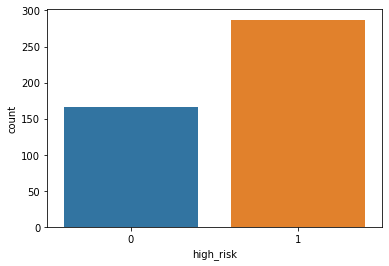

In [66]:
sns.countplot(data['high_risk'])

## Race

In [67]:
race = ['RaceAsian',
        'RaceBlack',
        'RaceOther',
        'RaceWhite']


In [68]:
def get_race(data):
    if data['RaceWhite'] == 1:
        return 'White'
    elif data['RaceBlack'] == 1:
        return 'Black'
    elif data['RaceAsian'] == 1:
        return 'Asian'
    else:
        return 'Other'

In [69]:
data['Race'] = data[race].apply(get_race, axis=1)


In [70]:
race_table = pd.crosstab(index=data['high_risk'], columns=data['Race'], margins=True)
race_table

Race,Asian,Black,Other,White,All
high_risk,,,,,
0,9,4,3,150,166
1,6,11,14,256,287
All,15,15,17,406,453


In [71]:
chi = chi2_contingency(race_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])


chi2:  6.83 
 p:  0.56 
 dof:  8.00 
 expected: 
[[  5.49668874   5.49668874   6.22958057 148.77704194 166.        ]
 [  9.50331126   9.50331126  10.77041943 257.22295806 287.        ]
 [ 15.          15.          17.         406.         453.        ]]


## Region

In [72]:
region = ['RegionAsia',
          'RegionEastEuro',
          'RegionNorthAmer',
          'RegionSouthAmer',
          'RegionWestEuro']


In [73]:
def get_region(data):
    if data['RegionAsia'] == 1:
        return 'Asia'
    elif data['RegionEastEuro'] == 1:
        return 'EastEuro'
    elif data['RegionNorthAmer'] == 1:
        return 'NorthAmer'
    elif data['RegionSouthAmer'] == 1:
        return 'SouthAmer'
    else:
        return 'WestEuro'


In [74]:
data['Region'] = data[region].apply(get_region, axis=1)


In [75]:
region_table = pd.crosstab(
    index=data['high_risk'], columns=data['Region'], margins=True)
region_table


Region,EastEuro,NorthAmer,SouthAmer,WestEuro,All
high_risk,,,,,
0,26,23,25,92,166
1,50,37,19,181,287
All,76,60,44,273,453


In [76]:
chi = chi2_contingency(region_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])

chi2:  9.00 
 p:  0.34 
 dof:  8.00 
 expected: 
[[ 27.84988962  21.98675497  16.12362031 100.0397351  166.        ]
 [ 48.15011038  38.01324503  27.87637969 172.9602649  287.        ]
 [ 76.          60.          44.         273.         453.        ]]


In [77]:
for i in range(101):
    print(" {0} - {1}".format(data.columns[i], data.iloc[200][i]))

 STUDYID - VEN
 RPT - VEN-206108302
 BMI - 23.1
 HEIGHTBL - 172.0
 WEIGHTBL - 68.4
 ALP - 4.094344562
 ALT - 2.564949357
 AST - 3.295836866
 CA - 2.44
 CREAT - 4.553876892
 HB - 12.3
 LDH - 5.319077385
 NEU - 1.481604541
 PLT - 379.0
 PSA - 2.424802726
 TBILI - 2.079441542
 TESTO - -0.510825624
 WBC - 2.054123734
 CREACL - 4.019553818
 NA. - 137.0
 MG - 0.019802627
 PHOS - 0.223143551
 ALB - 41.0
 TPRO - 76.0
 RBC - 4.117353118
 LYM - 0.548373617
 BUN - 1.940419546
 CCRC - 4.304551461
 GLU - 1.609437912
 SYSTOLICBP - 149.0
 DIASTOLICBP - 88.0
 PULSE - 77.55306968
 HEMAT - 0.374200879
 SPEGRA - 1.020414053
 LYMperLEU - 25.5447914
 MONO - 0.407112496
 MONOperLEU - 6.451450572
 NEUperLEU - 63.428814
 POT - 4.6
 BASOperLEU - 0.447677497
 EOS - 0.112579001
 EOSperLEU - 1.907101051
 TARGET - 0
 LYMPH_NODES - 0
 KIDNEYS - 0
 LUNGS - 1
 LIVER - 0
 PLEURA - 1
 OTHER - 0
 PROSTATE - 0
 ORCHIDECTOMY - 0
 PROSTATECTOMY - 0
 LYMPHADENECTOMY - 0
 BILATERAL_ORCHIDECTOMY - 0
 PRIOR_RADIOTHERAPY - 1
 A

# Chi-Square Test for Binary Variables

In [78]:
binary_stats = pd.DataFrame(columns=['Name', 'chi-2','chi-p', 'Odds-Ratio','fisher-p'])


In [79]:
# binary_stats.loc[len(binary_stats.index)] = ['Hello',0.05, 6.07]


In [80]:
def analyse_binary(name):
    print(name)
    table = pd.crosstab(index=data['high_risk'], columns=data[name])
    display(table)
    chi = chi2_contingency(table)
    print("chi2:  %.2f \n p:  %.2f \n dof:  %.f \n expected: " %(chi[0], chi[1], chi[2]))
    print(chi[3])
    if (table.shape == (2,2)):
        oddsr, fisherP = fisher_exact(table)
        print('Fisher Exact Test: \n Odds: %.2f \n p: %.2f' % (oddsr, fisherP))
        binary_stats.loc[len(binary_stats.index)] = [name, chi[0], chi[1], oddsr, fisherP]
        print(binary_stats.loc[len(binary_stats.index) -1 ])
    else:
        binary_stats.loc[len(binary_stats.index)] = [
            name, chi[0], chi[1], np.NaN, np.NaN]
    print('\n')
    print('\n')


In [81]:
binary = ['TARGET',
'LYMPH_NODES',
'KIDNEYS',
'LUNGS',
'LIVER',
'PLEURA',
'OTHER',
'PROSTATE',
'ORCHIDECTOMY',
'PROSTATECTOMY',
'LYMPHADENECTOMY',
'BILATERAL_ORCHIDECTOMY',
'PRIOR_RADIOTHERAPY',
'ANALGESICS',
'ANTI_ANDROGENS',
'GLUCOCORTICOID',
'GONADOTROPIN',
'BISPHOSPHONATE',
'CORTICOSTEROID',
'IMIDAZOLE',
'ACE_INHIBITORS',
'BETA_BLOCKING',
'HMG_COA_REDUCT',
'ESTROGENS',
'ANTI_ESTROGENS',
'CEREBACC',
'CHF',
'DVT',
'DIAB',
'MI',
'PULMEMB',
'SPINCOMP',
'COPD',
'MHBLOOD',
'MHCARD',
'MHCONGEN',
'MHEAR',
'MHENDO',
'MHGASTRO',
'MHHEPATO',
'MHIMMUNE',
'MHINFECT',
'MHINJURY',
'MHINVEST',
'MHMETAB',
'MHPSYCH',
'MHRENAL',
'MHRESP',
'MHSKIN',
'MHVASC',
'ECOG_C',
'AGEGRP2'
]

In [82]:
for feature in binary:
    analyse_binary(feature)

TARGET


TARGET,0,1
high_risk,,
0,81,85
1,145,142


chi2:  0.07 
 p:  0.80 
 dof:  1 
 expected: 
[[ 82.81677704  83.18322296]
 [143.18322296 143.81677704]]
Fisher Exact Test: 
 Odds: 0.93 
 p: 0.77
Name            TARGET
chi-2         0.065947
chi-p         0.797332
Odds-Ratio    0.933225
fisher-p      0.770071
Name: 0, dtype: object




LYMPH_NODES


LYMPH_NODES,0,1
high_risk,,
0,83,83
1,138,149


chi2:  0.09 
 p:  0.77 
 dof:  1 
 expected: 
[[ 80.98454746  85.01545254]
 [140.01545254 146.98454746]]
Fisher Exact Test: 
 Odds: 1.08 
 p: 0.70
Name          LYMPH_NODES
chi-2              0.0874
chi-p             0.76751
Odds-Ratio        1.07971
fisher-p         0.697746
Name: 1, dtype: object




KIDNEYS


KIDNEYS,0,1
high_risk,,
0,164,2
1,284,3


chi2:  0.10 
 p:  0.76 
 dof:  1 
 expected: 
[[164.16777042   1.83222958]
 [283.83222958   3.16777042]]
Fisher Exact Test: 
 Odds: 0.87 
 p: 1.00
Name           KIDNEYS
chi-2         0.096146
chi-p         0.756504
Odds-Ratio    0.866197
fisher-p           1.0
Name: 2, dtype: object




LUNGS


LUNGS,0,1
high_risk,,
0,143,23
1,249,38


chi2:  0.00 
 p:  0.97 
 dof:  1 
 expected: 
[[143.64679912  22.35320088]
 [248.35320088  38.64679912]]
Fisher Exact Test: 
 Odds: 0.95 
 p: 0.89
Name             LUNGS
chi-2         0.001758
chi-p         0.966551
Odds-Ratio    0.948839
fisher-p      0.886818
Name: 3, dtype: object




LIVER


LIVER,0,1
high_risk,,
0,157,9
1,249,38


chi2:  6.10 
 p:  0.01 
 dof:  1 
 expected: 
[[148.77704194  17.22295806]
 [257.22295806  29.77704194]]
Fisher Exact Test: 
 Odds: 2.66 
 p: 0.01
Name             LIVER
chi-2         6.098852
chi-p         0.013527
Odds-Ratio    2.662204
fisher-p      0.009894
Name: 4, dtype: object




PLEURA


PLEURA,0,1
high_risk,,
0,164,2
1,278,9


chi2:  0.94 
 p:  0.33 
 dof:  1 
 expected: 
[[161.96909492   4.03090508]
 [280.03090508   6.96909492]]
Fisher Exact Test: 
 Odds: 2.65 
 p: 0.34
Name            PLEURA
chi-2         0.940559
chi-p         0.332134
Odds-Ratio    2.654676
fisher-p      0.342019
Name: 5, dtype: object




OTHER


OTHER,0,1
high_risk,,
0,165,1
1,279,8


chi2:  1.58 
 p:  0.21 
 dof:  1 
 expected: 
[[162.70198675   3.29801325]
 [281.29801325   5.70198675]]
Fisher Exact Test: 
 Odds: 4.73 
 p: 0.16
Name             OTHER
chi-2         1.578574
chi-p         0.208966
Odds-Ratio    4.731183
fisher-p      0.164315
Name: 6, dtype: object




PROSTATE


PROSTATE,0,1
high_risk,,
0,142,24
1,262,25


chi2:  3.03 
 p:  0.08 
 dof:  1 
 expected: 
[[148.04415011  17.95584989]
 [255.95584989  31.04415011]]
Fisher Exact Test: 
 Odds: 0.56 
 p: 0.06
Name          PROSTATE
chi-2         3.029683
chi-p         0.081754
Odds-Ratio    0.564567
fisher-p      0.061384
Name: 7, dtype: object




ORCHIDECTOMY


ORCHIDECTOMY,0,1
high_risk,,
0,129,37
1,229,58


chi2:  0.16 
 p:  0.69 
 dof:  1 
 expected: 
[[131.18763797  34.81236203]
 [226.81236203  60.18763797]]
Fisher Exact Test: 
 Odds: 0.88 
 p: 0.63
Name          ORCHIDECTOMY
chi-2             0.163402
chi-p             0.686044
Odds-Ratio         0.88304
fisher-p          0.632592
Name: 8, dtype: object




PROSTATECTOMY


PROSTATECTOMY,0,1
high_risk,,
0,113,53
1,219,68


chi2:  3.23 
 p:  0.07 
 dof:  1 
 expected: 
[[121.66004415  44.33995585]
 [210.33995585  76.66004415]]
Fisher Exact Test: 
 Odds: 0.66 
 p: 0.06
Name          PROSTATECTOMY
chi-2              3.234195
chi-p              0.072116
Odds-Ratio         0.662014
fisher-p           0.061484
Name: 9, dtype: object




LYMPHADENECTOMY


LYMPHADENECTOMY,0,1
high_risk,,
0,138,28
1,261,26


chi2:  5.39 
 p:  0.02 
 dof:  1 
 expected: 
[[146.21192053  19.78807947]
 [252.78807947  34.21192053]]
Fisher Exact Test: 
 Odds: 0.49 
 p: 0.02
Name          LYMPHADENECTOMY
chi-2                5.385959
chi-p                0.020299
Odds-Ratio           0.490969
fisher-p             0.016064
Name: 10, dtype: object




BILATERAL_ORCHIDECTOMY


BILATERAL_ORCHIDECTOMY,0,1
high_risk,,
0,130,36
1,244,43


chi2:  2.83 
 p:  0.09 
 dof:  1 
 expected: 
[[137.05077263  28.94922737]
 [236.94922737  50.05077263]]
Fisher Exact Test: 
 Odds: 0.64 
 p: 0.07
Name          BILATERAL_ORCHIDECTOMY
chi-2                       2.833942
chi-p                       0.092292
Odds-Ratio                  0.636384
fisher-p                    0.073426
Name: 11, dtype: object




PRIOR_RADIOTHERAPY


PRIOR_RADIOTHERAPY,0,1
high_risk,,
0,77,89
1,129,158


chi2:  0.04 
 p:  0.84 
 dof:  1 
 expected: 
[[ 75.48785872  90.51214128]
 [130.51214128 156.48785872]]
Fisher Exact Test: 
 Odds: 1.06 
 p: 0.77
Name          PRIOR_RADIOTHERAPY
chi-2                   0.039285
chi-p                   0.842886
Odds-Ratio              1.059664
fisher-p                 0.76998
Name: 12, dtype: object




ANALGESICS


ANALGESICS,0,1
high_risk,,
0,136,30
1,174,113


chi2:  21.11 
 p:  0.00 
 dof:  1 
 expected: 
[[113.598234  52.401766]
 [196.401766  90.598234]]
Fisher Exact Test: 
 Odds: 2.94 
 p: 0.00
Name          ANALGESICS
chi-2           21.11374
chi-p           0.000004
Odds-Ratio      2.944061
fisher-p        0.000002
Name: 13, dtype: object




ANTI_ANDROGENS


ANTI_ANDROGENS,0,1
high_risk,,
0,16,150
1,31,256


chi2:  0.05 
 p:  0.82 
 dof:  1 
 expected: 
[[ 17.22295806 148.77704194]
 [ 29.77704194 257.22295806]]
Fisher Exact Test: 
 Odds: 0.88 
 p: 0.75
Name          ANTI_ANDROGENS
chi-2               0.053445
chi-p               0.817174
Odds-Ratio           0.88086
fisher-p            0.751149
Name: 14, dtype: object




GLUCOCORTICOID


GLUCOCORTICOID,0,1
high_risk,,
0,117,49
1,174,113


chi2:  4.03 
 p:  0.04 
 dof:  1 
 expected: 
[[106.63576159  59.36423841]
 [184.36423841 102.63576159]]
Fisher Exact Test: 
 Odds: 1.55 
 p: 0.04
Name          GLUCOCORTICOID
chi-2                4.02739
chi-p               0.044767
Odds-Ratio          1.550669
fisher-p            0.041765
Name: 15, dtype: object




GONADOTROPIN


GONADOTROPIN,0,1
high_risk,,
0,25,141
1,49,238


chi2:  0.18 
 p:  0.67 
 dof:  1 
 expected: 
[[ 27.11699779 138.88300221]
 [ 46.88300221 240.11699779]]
Fisher Exact Test: 
 Odds: 0.86 
 p: 0.60
Name          GONADOTROPIN
chi-2             0.181908
chi-p             0.669738
Odds-Ratio        0.861196
fisher-p          0.600717
Name: 16, dtype: object




BISPHOSPHONATE


BISPHOSPHONATE,0,1
high_risk,,
0,93,73
1,172,115


chi2:  0.51 
 p:  0.48 
 dof:  1 
 expected: 
[[ 97.10816777  68.89183223]
 [167.89183223 119.10816777]]
Fisher Exact Test: 
 Odds: 0.85 
 p: 0.43
Name          BISPHOSPHONATE
chi-2               0.509887
chi-p               0.475188
Odds-Ratio          0.851784
fisher-p            0.429894
Name: 17, dtype: object




CORTICOSTEROID


CORTICOSTEROID,0,1
high_risk,,
0,123,43
1,244,43


chi2:  7.46 
 p:  0.01 
 dof:  1 
 expected: 
[[134.48565121  31.51434879]
 [232.51434879  54.48565121]]
Fisher Exact Test: 
 Odds: 0.50 
 p: 0.01
Name          CORTICOSTEROID
chi-2               7.460909
chi-p               0.006305
Odds-Ratio          0.504098
fisher-p            0.006015
Name: 18, dtype: object




IMIDAZOLE


IMIDAZOLE,0,1
high_risk,,
0,153,13
1,264,23


chi2:  0.01 
 p:  0.91 
 dof:  1 
 expected: 
[[152.80794702  13.19205298]
 [264.19205298  22.80794702]]
Fisher Exact Test: 
 Odds: 1.03 
 p: 1.00
Name          IMIDAZOLE
chi-2          0.012326
chi-p          0.911599
Odds-Ratio      1.02535
fisher-p            1.0
Name: 19, dtype: object




ACE_INHIBITORS


ACE_INHIBITORS,0,1
high_risk,,
0,122,44
1,229,58


chi2:  2.04 
 p:  0.15 
 dof:  1 
 expected: 
[[128.62251656  37.37748344]
 [222.37748344  64.62251656]]
Fisher Exact Test: 
 Odds: 0.70 
 p: 0.13
Name          ACE_INHIBITORS
chi-2               2.042948
chi-p               0.152913
Odds-Ratio          0.702263
fisher-p            0.130181
Name: 20, dtype: object




BETA_BLOCKING


BETA_BLOCKING,0,1
high_risk,,
0,134,32
1,227,60


chi2:  0.09 
 p:  0.77 
 dof:  1 
 expected: 
[[132.28697572  33.71302428]
 [228.71302428  58.28697572]]
Fisher Exact Test: 
 Odds: 1.11 
 p: 0.72
Name          BETA_BLOCKING
chi-2              0.086447
chi-p              0.768744
Odds-Ratio         1.106828
fisher-p            0.71734
Name: 21, dtype: object




HMG_COA_REDUCT


HMG_COA_REDUCT,0,1
high_risk,,
0,126,40
1,221,66


chi2:  0.02 
 p:  0.88 
 dof:  1 
 expected: 
[[127.15673289  38.84326711]
 [219.84326711  67.15673289]]
Fisher Exact Test: 
 Odds: 0.94 
 p: 0.82
Name          HMG_COA_REDUCT
chi-2                0.02288
chi-p               0.879771
Odds-Ratio          0.940724
fisher-p             0.81827
Name: 22, dtype: object




ESTROGENS


ESTROGENS,0,1
high_risk,,
0,140,26
1,264,23


chi2:  5.61 
 p:  0.02 
 dof:  1 
 expected: 
[[148.04415011  17.95584989]
 [255.95584989  31.04415011]]
Fisher Exact Test: 
 Odds: 0.47 
 p: 0.02
Name          ESTROGENS
chi-2          5.609806
chi-p           0.01786
Odds-Ratio     0.469114
fisher-p       0.017701
Name: 23, dtype: object




ANTI_ESTROGENS


ANTI_ESTROGENS,0,1
high_risk,,
0,163,3
1,285,2


chi2:  0.39 
 p:  0.53 
 dof:  1 
 expected: 
[[164.16777042   1.83222958]
 [283.83222958   3.16777042]]
Fisher Exact Test: 
 Odds: 0.38 
 p: 0.36
Name          ANTI_ESTROGENS
chi-2               0.388428
chi-p               0.533127
Odds-Ratio          0.381287
fisher-p            0.361049
Name: 24, dtype: object




CEREBACC


CEREBACC,0,1
high_risk,,
0,162,4
1,280,7


chi2:  0.09 
 p:  0.77 
 dof:  1 
 expected: 
[[161.96909492   4.03090508]
 [280.03090508   6.96909492]]
Fisher Exact Test: 
 Odds: 1.01 
 p: 1.00
Name          CEREBACC
chi-2          0.08831
chi-p         0.766336
Odds-Ratio      1.0125
fisher-p           1.0
Name: 25, dtype: object




CHF


CHF,0,1
high_risk,,
0,165,1
1,279,8


chi2:  1.58 
 p:  0.21 
 dof:  1 
 expected: 
[[162.70198675   3.29801325]
 [281.29801325   5.70198675]]
Fisher Exact Test: 
 Odds: 4.73 
 p: 0.16
Name               CHF
chi-2         1.578574
chi-p         0.208966
Odds-Ratio    4.731183
fisher-p      0.164315
Name: 26, dtype: object




DVT


DVT,0,1
high_risk,,
0,163,3
1,280,7


chi2:  0.01 
 p:  0.91 
 dof:  1 
 expected: 
[[162.33554084   3.66445916]
 [280.66445916   6.33554084]]
Fisher Exact Test: 
 Odds: 1.36 
 p: 0.75
Name               DVT
chi-2         0.011913
chi-p         0.913087
Odds-Ratio    1.358333
fisher-p      0.752398
Name: 27, dtype: object




DIAB


DIAB,0,1
high_risk,,
0,135,31
1,228,59


chi2:  0.13 
 p:  0.72 
 dof:  1 
 expected: 
[[133.01986755  32.98013245]
 [229.98013245  57.01986755]]
Fisher Exact Test: 
 Odds: 1.13 
 p: 0.71
Name              DIAB
chi-2         0.130845
chi-p         0.717558
Odds-Ratio     1.12691
fisher-p      0.714134
Name: 28, dtype: object




MI


MI,0,1
high_risk,,
0,162,4
1,262,25


chi2:  5.96 
 p:  0.01 
 dof:  1 
 expected: 
[[155.37306843  10.62693157]
 [268.62693157  18.37306843]]
Fisher Exact Test: 
 Odds: 3.86 
 p: 0.01
Name                MI
chi-2         5.956989
chi-p         0.014659
Odds-Ratio    3.864504
fisher-p      0.008677
Name: 29, dtype: object




PULMEMB


PULMEMB,0,1
high_risk,,
0,166,0
1,282,5


chi2:  1.55 
 p:  0.21 
 dof:  1 
 expected: 
[[164.16777042   1.83222958]
 [283.83222958   3.16777042]]
Fisher Exact Test: 
 Odds: inf 
 p: 0.16
Name           PULMEMB
chi-2         1.546019
chi-p         0.213724
Odds-Ratio         inf
fisher-p      0.163438
Name: 30, dtype: object




SPINCOMP


SPINCOMP,0,1
high_risk,,
0,165,1
1,285,2


chi2:  0.23 
 p:  0.63 
 dof:  1 
 expected: 
[[164.90066225   1.09933775]
 [285.09933775   1.90066225]]
Fisher Exact Test: 
 Odds: 1.16 
 p: 1.00
Name          SPINCOMP
chi-2         0.232021
chi-p         0.630029
Odds-Ratio    1.157895
fisher-p           1.0
Name: 31, dtype: object




COPD


COPD,0,1
high_risk,,
0,164,2
1,280,7


chi2:  0.31 
 p:  0.58 
 dof:  1 
 expected: 
[[162.70198675   3.29801325]
 [281.29801325   5.70198675]]
Fisher Exact Test: 
 Odds: 2.05 
 p: 0.50
Name              COPD
chi-2         0.310956
chi-p         0.577094
Odds-Ratio        2.05
fisher-p      0.496315
Name: 32, dtype: object




MHBLOOD


MHBLOOD,0,1
high_risk,,
0,162,4
1,271,16


chi2:  1.80 
 p:  0.18 
 dof:  1 
 expected: 
[[158.67108168   7.32891832]
 [274.32891832  12.67108168]]
Fisher Exact Test: 
 Odds: 2.39 
 p: 0.15
Name           MHBLOOD
chi-2         1.803132
chi-p         0.179334
Odds-Ratio    2.391144
fisher-p      0.154381
Name: 33, dtype: object




MHCARD


MHCARD,0,1
high_risk,,
0,140,26
1,221,66


chi2:  3.06 
 p:  0.08 
 dof:  1 
 expected: 
[[132.28697572  33.71302428]
 [228.71302428  58.28697572]]
Fisher Exact Test: 
 Odds: 1.61 
 p: 0.07
Name            MHCARD
chi-2         3.056641
chi-p         0.080408
Odds-Ratio    1.608075
fisher-p      0.069257
Name: 34, dtype: object




MHCONGEN


MHCONGEN,0,1
high_risk,,
0,162,4
1,282,5


chi2:  0.02 
 p:  0.89 
 dof:  1 
 expected: 
[[162.70198675   3.29801325]
 [281.29801325   5.70198675]]
Fisher Exact Test: 
 Odds: 0.72 
 p: 0.73
Name          MHCONGEN
chi-2         0.019922
chi-p         0.887756
Odds-Ratio    0.718085
fisher-p       0.73022
Name: 35, dtype: object




MHEAR


MHEAR,0,1
high_risk,,
0,159,7
1,283,4


chi2:  2.45 
 p:  0.12 
 dof:  1 
 expected: 
[[161.96909492   4.03090508]
 [280.03090508   6.96909492]]
Fisher Exact Test: 
 Odds: 0.32 
 p: 0.11
Name             MHEAR
chi-2         2.446613
chi-p         0.117779
Odds-Ratio     0.32105
fisher-p      0.108084
Name: 36, dtype: object




MHENDO


MHENDO,0,1
high_risk,,
0,160,6
1,283,4


chi2:  1.48 
 p:  0.22 
 dof:  1 
 expected: 
[[162.33554084   3.66445916]
 [280.66445916   6.33554084]]
Fisher Exact Test: 
 Odds: 0.38 
 p: 0.18
Name            MHENDO
chi-2         1.483983
chi-p         0.223152
Odds-Ratio    0.376914
fisher-p      0.181634
Name: 37, dtype: object




MHGASTRO


MHGASTRO,0,1
high_risk,,
0,117,49
1,208,79


chi2:  0.12 
 p:  0.73 
 dof:  1 
 expected: 
[[119.09492274  46.90507726]
 [205.90507726  81.09492274]]
Fisher Exact Test: 
 Odds: 0.91 
 p: 0.67
Name          MHGASTRO
chi-2         0.119314
chi-p          0.72978
Odds-Ratio    0.906888
fisher-p      0.665901
Name: 38, dtype: object




MHHEPATO


MHHEPATO,0,1
high_risk,,
0,160,6
1,279,8


chi2:  0.04 
 p:  0.83 
 dof:  1 
 expected: 
[[160.86975717   5.13024283]
 [278.13024283   8.86975717]]
Fisher Exact Test: 
 Odds: 0.76 
 p: 0.78
Name          MHHEPATO
chi-2         0.043406
chi-p         0.834964
Odds-Ratio    0.764636
fisher-p      0.779065
Name: 39, dtype: object




MHIMMUNE


MHIMMUNE,0,1
high_risk,,
0,165,1
1,280,7


chi2:  1.12 
 p:  0.29 
 dof:  1 
 expected: 
[[163.06843267   2.93156733]
 [281.93156733   5.06843267]]
Fisher Exact Test: 
 Odds: 4.12 
 p: 0.27
Name          MHIMMUNE
chi-2         1.123255
chi-p         0.289219
Odds-Ratio       4.125
fisher-p      0.267847
Name: 40, dtype: object




MHINFECT


MHINFECT,0,1
high_risk,,
0,148,18
1,252,35


chi2:  0.08 
 p:  0.78 
 dof:  1 
 expected: 
[[146.57836645  19.42163355]
 [253.42163355  33.57836645]]
Fisher Exact Test: 
 Odds: 1.14 
 p: 0.76
Name          MHINFECT
chi-2         0.078178
chi-p         0.779782
Odds-Ratio    1.141975
fisher-p      0.762143
Name: 41, dtype: object




MHINJURY


MHINJURY,0,1
high_risk,,
0,155,11
1,272,15


chi2:  0.17 
 p:  0.68 
 dof:  1 
 expected: 
[[156.47240618   9.52759382]
 [270.52759382  16.47240618]]
Fisher Exact Test: 
 Odds: 0.78 
 p: 0.54
Name          MHINJURY
chi-2         0.166188
chi-p         0.683522
Odds-Ratio    0.777072
fisher-p      0.536218
Name: 42, dtype: object




MHINVEST


MHINVEST,0,1
high_risk,,
0,151,15
1,265,22


chi2:  0.11 
 p:  0.74 
 dof:  1 
 expected: 
[[152.4415011  13.5584989]
 [263.5584989  23.4415011]]
Fisher Exact Test: 
 Odds: 0.84 
 p: 0.60
Name          MHINVEST
chi-2          0.11237
chi-p         0.737462
Odds-Ratio    0.835723
fisher-p      0.598431
Name: 43, dtype: object




MHMETAB


MHMETAB,0,1
high_risk,,
0,104,62
1,186,101


chi2:  0.13 
 p:  0.72 
 dof:  1 
 expected: 
[[106.26931567  59.73068433]
 [183.73068433 103.26931567]]
Fisher Exact Test: 
 Odds: 0.91 
 p: 0.68
Name           MHMETAB
chi-2          0.12922
chi-p         0.719242
Odds-Ratio    0.910857
fisher-p      0.684798
Name: 44, dtype: object




MHPSYCH


MHPSYCH,0,1
high_risk,,
0,156,10
1,250,37


chi2:  4.62 
 p:  0.03 
 dof:  1 
 expected: 
[[148.77704194  17.22295806]
 [257.22295806  29.77704194]]
Fisher Exact Test: 
 Odds: 2.31 
 p: 0.02
Name           MHPSYCH
chi-2         4.621698
chi-p          0.03157
Odds-Ratio      2.3088
fisher-p       0.02452
Name: 45, dtype: object




MHRENAL


MHRENAL,0,1
high_risk,,
0,137,29
1,227,60


chi2:  0.58 
 p:  0.44 
 dof:  1 
 expected: 
[[133.38631347  32.61368653]
 [230.61368653  56.38631347]]
Fisher Exact Test: 
 Odds: 1.25 
 p: 0.39
Name           MHRENAL
chi-2         0.583933
chi-p         0.444775
Odds-Ratio    1.248671
fisher-p      0.393231
Name: 46, dtype: object




MHRESP


MHRESP,0,1
high_risk,,
0,148,18
1,246,41


chi2:  0.82 
 p:  0.37 
 dof:  1 
 expected: 
[[144.37969095  21.62030905]
 [249.62030905  37.37969095]]
Fisher Exact Test: 
 Odds: 1.37 
 p: 0.31
Name            MHRESP
chi-2         0.817244
chi-p         0.365987
Odds-Ratio     1.37037
fisher-p      0.314434
Name: 47, dtype: object




MHSKIN


MHSKIN,0,1
high_risk,,
0,159,7
1,275,12


chi2:  0.05 
 p:  0.82 
 dof:  1 
 expected: 
[[159.03752759   6.96247241]
 [274.96247241  12.03752759]]
Fisher Exact Test: 
 Odds: 0.99 
 p: 1.00
Name            MHSKIN
chi-2          0.05061
chi-p         0.822006
Odds-Ratio    0.991169
fisher-p           1.0
Name: 48, dtype: object




MHVASC


MHVASC,0,1
high_risk,,
0,65,101
1,168,119


chi2:  15.05 
 p:  0.00 
 dof:  1 
 expected: 
[[ 85.38189845  80.61810155]
 [147.61810155 139.38189845]]
Fisher Exact Test: 
 Odds: 0.46 
 p: 0.00
Name             MHVASC
chi-2         15.046716
chi-p          0.000105
Odds-Ratio     0.455858
fisher-p       0.000091
Name: 49, dtype: object




ECOG_C


ECOG_C,0,1
high_risk,,
0,103,63
1,104,183


chi2:  27.21 
 p:  0.00 
 dof:  1 
 expected: 
[[ 75.85430464  90.14569536]
 [131.14569536 155.85430464]]
Fisher Exact Test: 
 Odds: 2.88 
 p: 0.00
Name             ECOG_C
chi-2         27.205285
chi-p               0.0
Odds-Ratio     2.876832
fisher-p            0.0
Name: 50, dtype: object




AGEGRP2


AGEGRP2,0,1,2
high_risk,,,
0,49,83,34
1,89,116,82


chi2:  4.96 
 p:  0.08 
 dof:  2 
 expected: 
[[ 50.56953642  72.92273731  42.50772627]
 [ 87.43046358 126.07726269  73.49227373]]






In [83]:
binary_stats.sort_values(by='chi-p')

,Name,chi-2,chi-p,Odds-Ratio,fisher-p
50,ECOG_C,27.205285,1.829578e-07,2.876832,1.155140e-07
13,ANALGESICS,21.113740,4.328137e-06,2.944061,2.021207e-06
49,MHVASC,15.046716,1.048826e-04,0.455858,9.065897e-05
18,CORTICOSTEROID,7.460909,6.305317e-03,0.504098,6.014646e-03
4,LIVER,6.098852,1.352697e-02,2.662204,9.893550e-03
29,MI,5.956989,1.465905e-02,3.864504,8.676813e-03
23,ESTROGENS,5.609806,1.786024e-02,0.469114,1.770121e-02
10,LYMPHADENECTOMY,5.385959,2.029943e-02,0.490969,1.606362e-02
45,MHPSYCH,4.621698,3.156998e-02,2.308800,2.452001e-02
15,GLUCOCORTICOID,4.027390,4.476714e-02,1.550669,4.176470e-02


In [85]:
binary_stats.sort_values(by='fisher-p')


,Name,chi-2,chi-p,Odds-Ratio,fisher-p
50,ECOG_C,27.205285,1.829578e-07,2.876832,1.155140e-07
13,ANALGESICS,21.113740,4.328137e-06,2.944061,2.021207e-06
49,MHVASC,15.046716,1.048826e-04,0.455858,9.065897e-05
18,CORTICOSTEROID,7.460909,6.305317e-03,0.504098,6.014646e-03
29,MI,5.956989,1.465905e-02,3.864504,8.676813e-03
4,LIVER,6.098852,1.352697e-02,2.662204,9.893550e-03
10,LYMPHADENECTOMY,5.385959,2.029943e-02,0.490969,1.606362e-02
23,ESTROGENS,5.609806,1.786024e-02,0.469114,1.770121e-02
45,MHPSYCH,4.621698,3.156998e-02,2.308800,2.452001e-02
15,GLUCOCORTICOID,4.027390,4.476714e-02,1.550669,4.176470e-02


# Continous Variables

In [ ]:
continous = ['BMI',
             'HEIGHTBL',
             'WEIGHTBL',
             'ALP',
             'ALT',
             'AST',
             'CA',
             'CREAT',
             'HB',
             'LDH',
             'NEU',
             'PLT',
             'PSA',
             'TBILI',
             'TESTO',
             'WBC',
             'CREACL',
             'NA.',
             'MG',
             'PHOS',
             'ALB',
             'TPRO',
             'RBC',
             'LYM',
             'BUN',
             'CCRC',
             'GLU',
             'SYSTOLICBP',
             'DIASTOLICBP',
             'PULSE',
             'HEMAT',
             'SPEGRA',
             'LYMperLEU',
             'MONO',
             'MONOperLEU',
             'NEUperLEU',
             'POT',
             'BASOperLEU',
             'EOS',
             'EOSperLEU']


In [ ]:
def analyse_continuous(name):
    plt.figure(figsize=(6,4))
    display(sns.boxplot(x="high_risk",y=name, data=data))

<AxesSubplot:xlabel='high_risk', ylabel='BMI'>

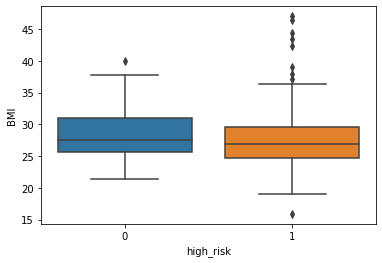

In [ ]:
analyse_continuous('BMI')